# saving demo for sklearn models

In [23]:
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression, Lasso
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler
import sklearn.model_selection 
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [24]:
# load training data
Xtr_path = 'Xtr.csv'
ytr_path = 'ytr.csv'
Xts_path = 'Xts.csv'

Xtr = np.loadtxt(Xtr_path, delimiter=",")
ytr = np.loadtxt(ytr_path, delimiter=",")
Xts = np.loadtxt(Xts_path, delimiter=",")

In [25]:
# Standardize the data

scaler = StandardScaler() # could also use RobustScaler() here!
Xtr = scaler.fit_transform(Xtr) # compute standardization from training data and apply to training data
Xts = scaler.fit_transform(Xts) # compute standardization from testing data and apply to testing data

In [26]:
# Feature Selection

import sklearn.model_selection 

# Manual approach using 2 for-loops

# Create a k-fold cross validation object
nfold = 10
kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True,random_state=2)

# Create the LASSO model.  We use the `warm start` parameter so that the fit will start at the previous value.
# This speeds up the fitting.
lasso = Lasso(fit_intercept=False,warm_start=True)

# Regularization values to test
nalpha = 100
alphas = np.logspace(-3,1,nalpha)

# MSE for each alpha and fold value
mse = np.zeros((nalpha,nfold))
for ifold, ind in enumerate(kf.split(Xtr)):
    
    # Get the training data in the split
    Itr,Its = ind
    X_tr = Xtr[Itr,:]
    y_tr = ytr[Itr]
    
    # Compute the lasso path for the split
    for ia, a in enumerate(alphas):
        
        # Fit the model on the training data
        lasso.alpha = a
        lasso.fit(X_tr,y_tr)
        
        # Compute the prediction error on the test data
        y_tr_pred = lasso.predict(X_tr)
        mse[ia,ifold] = np.mean((y_tr_pred-y_tr)**2)

# Compute the MSE mean over the folds and its standard error
mse_cv = np.mean(mse,axis=1)
mse_se = np.std(mse,axis=1,ddof=1) / np.sqrt(nfold)

# Find the minimum MSE
imin = np.argmin(mse_cv)
alpha_min = alphas[imin]
mse_cv_lasso = mse_cv[imin]

# Manual approach to refitting LASSO on entire training data
lasso.alpha = alpha_min
lasso.fit(Xtr,ytr)
print('Manual LASSO refit:')
print(" intrcpt %f" % lasso.intercept_)
for i, c in enumerate(lasso.coef_):
    print("%8s %f" % (i, c))


Manual LASSO refit:
 intrcpt 0.000000
       0 0.710419
       1 -1.194056
       2 1.003718
       3 0.828824
       4 -0.119656
       5 2.336672
       6 0.304381
       7 -0.929152
       8 0.008433
       9 -0.044465
      10 -0.139905
      11 0.060662
      12 0.074280
      13 0.066365
      14 -0.020887
      15 -0.066928


In [27]:
# Sort coefficient

np.sort(abs(lasso.coef_))

array([0.00843319, 0.02088663, 0.04446468, 0.0606617 , 0.06636467,
       0.06692842, 0.07427952, 0.11965633, 0.13990481, 0.30438119,
       0.71041853, 0.82882422, 0.92915234, 1.00371826, 1.19405587,
       2.33667166])

In [28]:
# Select important features 
Xtr = Xtr[:,[0,1,2,3,4,5,6,7]]
Xts = Xts[:,[0,1,2,3,4,5,6,7]]

In [29]:
# train a model
# Benchmark Logistic Regression
lr = LogisticRegression()
lr.fit(Xtr, ytr)

acc = np.mean(lr.predict(Xtr)==ytr)
print('training accuracy: ',acc)

# Benchmark Logistic Regression has an accuracy 0.6582

training accuracy:  0.6582


In [30]:
# train a model
# Multinomial Logistic Regression
lr = LogisticRegression(multi_class='multinomial', penalty = "none")
lr.fit(Xtr, ytr)

acc = np.mean(lr.predict(Xtr)==ytr)
print('training accuracy: ',acc)

# Multinomial Logistic Regression has an accuracy 0.6583

training accuracy:  0.6583


In [31]:
# train a model
# Multinominal L1 Logistic Regression
lr = LogisticRegression(multi_class='multinomial', solver = "saga", penalty = "l1")
lr.fit(Xtr, ytr)

acc = np.mean(lr.predict(Xtr)==ytr)
print('training accuracy: ',acc)

# Multinominal L1 Logistic Regression has an accuracy 0.6578

training accuracy:  0.6587


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [32]:
# train a model
# Multinominal L2 Logistic Regression
lr = LogisticRegression(multi_class='multinomial', solver = "saga", penalty = "l2")
lr.fit(Xtr, ytr)

acc = np.mean(lr.predict(Xtr)==ytr)
print('training accuracy: ',acc)

# Multinominal L2 Logistic Regression has an accuracy 0.6553


training accuracy:  0.6582


In [33]:
# train a model
# L1 penalty Logistic Regression
lr = LogisticRegression(multi_class='ovr', solver = "liblinear", penalty = "l1")
lr.fit(Xtr, ytr)

acc = np.mean(lr.predict(Xtr)==ytr)
print('training accuracy: ',acc)

# L1 penalty Logistic Regression has an accuracy 0.6152

training accuracy:  0.6165


In [34]:
# train a model
# L2 penalty Logistic Regression
lr = LogisticRegression(multi_class='ovr', solver = "liblinear", penalty = "l2")
lr.fit(Xtr, ytr)

acc = np.mean(lr.predict(Xtr)==ytr)
print('training accuracy: ',acc)

# L2 penalty Logistic Regression has an accuracy 0.609

training accuracy:  0.6157


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: Convergenc

Text(0, 0.5, 'Error rate')

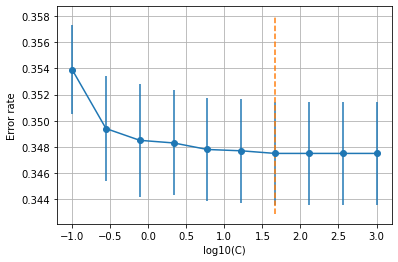

In [35]:
nfold = 10
kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True, random_state = 42)
# Define the grid
npen = 10
C_lasso = np.logspace(-1,3,npen)

# Create the lasso object
lasso = LogisticRegression(multi_class='multinomial', solver = "saga", penalty = "l1")

# Run cross-validation
parameters = {'C':C_lasso}
clf = GridSearchCV(lasso, parameters, cv=kf, scoring='accuracy')
clf.fit(Xtr,ytr)

# Average test results across folds
err_mean = 1-clf.cv_results_['mean_test_score'] # error-rate = 1-accuracy
err_se = clf.cv_results_['std_test_score']/np.sqrt(nfold-1)
imin = np.argmin(err_mean)
C_min = C_lasso[imin]

# Plot error statistics versus C
plt.errorbar(np.log10(C_lasso), err_mean, marker='o',yerr=err_se)
xmin, xmax, ymin, ymax = plt.axis()
plt.plot(np.log10([C_min,C_min]),[ymin,ymax],'--')
#plt.ylim([0.02,0.05])
plt.grid()
plt.xlabel('log10(C)')
plt.ylabel('Error rate')

In [36]:
print("The minimum test error rate = %12.4e, SE=%12.4e" % (err_mean[imin], err_se[imin]))
print("The C value corresponding to minimum error = %12.4e" % C_min)
print("The best regularization weight corresponding to minimum error = %12.4e" % (1/C_min))

The minimum test error rate =   3.4750e-01, SE=  3.9250e-03
The C value corresponding to minimum error =   4.6416e+01
The best regularization weight corresponding to minimum error =   2.1544e-02


In [37]:
# One-verst-rest - hinge loss L2

svc = svm.LinearSVC(loss = "hinge", multi_class = "ovr", penalty = "l2")
svc.fit(Xtr, ytr)
acc = np.mean(svc.predict(Xtr)==ytr)
print('training accuracy: ',acc)


training accuracy:  0.4218


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [38]:
# One-verst-rest - squared hinge loss L2

svc = svm.LinearSVC(loss = "squared_hinge", multi_class = "ovr", penalty = "l2")
svc.fit(Xtr, ytr)
acc = np.mean(svc.predict(Xtr)==ytr)
print('training accuracy: ',acc)


training accuracy:  0.5767


In [39]:
Xtr.shape

(10000, 8)

In [40]:
# Joint hinge L1

svc = svm.LinearSVC(loss = "hinge", multi_class = "crammer_singer", penalty = "l1")
svc.fit(Xtr, ytr)
acc = np.mean(svc.predict(Xtr)==ytr)
print('training accuracy: ',acc)


training accuracy:  0.6428


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [41]:
# Joint squared hinge L1

svc = svm.LinearSVC(loss = "squared_hinge", multi_class = "crammer_singer", penalty = "l1")
svc.fit(Xtr, ytr)
acc = np.mean(svc.predict(Xtr)==ytr)
print('training accuracy: ',acc)

training accuracy:  0.6428


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [42]:
# Joint hinge L2

svc = svm.LinearSVC(loss = "hinge", multi_class = "crammer_singer", penalty = "l2")
svc.fit(Xtr, ytr)
acc = np.mean(svc.predict(Xtr)==ytr)
print('training accuracy: ',acc)


training accuracy:  0.6428


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [43]:
# Joint squared hinge L2

svc = svm.LinearSVC(loss = "squared_hinge", multi_class = "crammer_singer", penalty = "l2")
svc.fit(Xtr, ytr)
acc = np.mean(svc.predict(Xtr)==ytr)
print('training accuracy: ',acc)

training accuracy:  0.6428


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [44]:
# one-verse-one

svc = svm.SVC(probability=False, kernel="rbf", C=47.5, gamma=1.05, verbose=1)
#svc = svm.SVC(probability=False, kernel="rbf", C=47.25, gamma=1.025, verbose=1) 91.760
svc.fit(Xtr,ytr)

acc = np.mean(svc.predict(Xtr)==ytr)
print('training accuracy: ',acc)

[LibSVM]training accuracy:  0.9945


In [227]:
nfold = 10
kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True,random_state=42)

C_test = [47.3, 47.35,47.4, 47.45, 47.5]
gam_test = [1.025, 1.03, 1.035,1.04, 1.045, 1.05]
parameters = {'C':C_test, 'gamma':gam_test}
clf = GridSearchCV(svc, parameters, cv=kf, verbose=10).fit(Xtr,ytr)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV 1/10; 1/30] START C=47.3, gamma=1.025.......................................
[LibSVM][CV 1/10; 1/30] END .....................C=47.3, gamma=1.025; total time=   3.6s
[CV 2/10; 1/30] START C=47.3, gamma=1.025.......................................
[LibSVM][CV 2/10; 1/30] END .....................C=47.3, gamma=1.025; total time=   3.6s
[CV 3/10; 1/30] START C=47.3, gamma=1.025.......................................
[LibSVM][CV 3/10; 1/30] END .....................C=47.3, gamma=1.025; total time=   3.5s
[CV 4/10; 1/30] START C=47.3, gamma=1.025.......................................
[LibSVM][CV 4/10; 1/30] END .....................C=47.3, gamma=1.025; total time=   3.5s
[CV 5/10; 1/30] START C=47.3, gamma=1.025.......................................
[LibSVM][CV 5/10; 1/30] END .....................C=47.3, gamma=1.025; total time=   3.4s
[CV 6/10; 1/30] START C=47.3, gamma=1.025.......................................
[LibSV

[LibSVM][CV 9/10; 5/30] END .....................C=47.3, gamma=1.045; total time=   3.5s
[CV 10/10; 5/30] START C=47.3, gamma=1.045......................................
[LibSVM][CV 10/10; 5/30] END ....................C=47.3, gamma=1.045; total time=   3.5s
[CV 1/10; 6/30] START C=47.3, gamma=1.05........................................
[LibSVM][CV 1/10; 6/30] END ......................C=47.3, gamma=1.05; total time=   3.5s
[CV 2/10; 6/30] START C=47.3, gamma=1.05........................................
[LibSVM][CV 2/10; 6/30] END ......................C=47.3, gamma=1.05; total time=   3.5s
[CV 3/10; 6/30] START C=47.3, gamma=1.05........................................
[LibSVM][CV 3/10; 6/30] END ......................C=47.3, gamma=1.05; total time=   3.5s
[CV 4/10; 6/30] START C=47.3, gamma=1.05........................................
[LibSVM][CV 4/10; 6/30] END ......................C=47.3, gamma=1.05; total time=   3.5s
[CV 5/10; 6/30] START C=47.3, gamma=1.05.....................

[LibSVM][CV 8/10; 10/30] END ....................C=47.35, gamma=1.04; total time=   3.5s
[CV 9/10; 10/30] START C=47.35, gamma=1.04......................................
[LibSVM][CV 9/10; 10/30] END ....................C=47.35, gamma=1.04; total time=   3.5s
[CV 10/10; 10/30] START C=47.35, gamma=1.04.....................................
[LibSVM][CV 10/10; 10/30] END ...................C=47.35, gamma=1.04; total time=   3.5s
[CV 1/10; 11/30] START C=47.35, gamma=1.045.....................................
[LibSVM][CV 1/10; 11/30] END ...................C=47.35, gamma=1.045; total time=   3.5s
[CV 2/10; 11/30] START C=47.35, gamma=1.045.....................................
[LibSVM][CV 2/10; 11/30] END ...................C=47.35, gamma=1.045; total time=   3.5s
[CV 3/10; 11/30] START C=47.35, gamma=1.045.....................................
[LibSVM][CV 3/10; 11/30] END ...................C=47.35, gamma=1.045; total time=   3.5s
[CV 4/10; 11/30] START C=47.35, gamma=1.045..................

[LibSVM][CV 7/10; 15/30] END ....................C=47.4, gamma=1.035; total time=   3.5s
[CV 8/10; 15/30] START C=47.4, gamma=1.035......................................
[LibSVM][CV 8/10; 15/30] END ....................C=47.4, gamma=1.035; total time=   3.5s
[CV 9/10; 15/30] START C=47.4, gamma=1.035......................................
[LibSVM][CV 9/10; 15/30] END ....................C=47.4, gamma=1.035; total time=   3.5s
[CV 10/10; 15/30] START C=47.4, gamma=1.035.....................................
[LibSVM][CV 10/10; 15/30] END ...................C=47.4, gamma=1.035; total time=   3.4s
[CV 1/10; 16/30] START C=47.4, gamma=1.04.......................................
[LibSVM][CV 1/10; 16/30] END .....................C=47.4, gamma=1.04; total time=   3.5s
[CV 2/10; 16/30] START C=47.4, gamma=1.04.......................................
[LibSVM][CV 2/10; 16/30] END .....................C=47.4, gamma=1.04; total time=   3.5s
[CV 3/10; 16/30] START C=47.4, gamma=1.04....................

[LibSVM][CV 6/10; 20/30] END ....................C=47.45, gamma=1.03; total time=   3.5s
[CV 7/10; 20/30] START C=47.45, gamma=1.03......................................
[LibSVM][CV 7/10; 20/30] END ....................C=47.45, gamma=1.03; total time=   3.4s
[CV 8/10; 20/30] START C=47.45, gamma=1.03......................................
[LibSVM][CV 8/10; 20/30] END ....................C=47.45, gamma=1.03; total time=   3.4s
[CV 9/10; 20/30] START C=47.45, gamma=1.03......................................
[LibSVM][CV 9/10; 20/30] END ....................C=47.45, gamma=1.03; total time=   3.4s
[CV 10/10; 20/30] START C=47.45, gamma=1.03.....................................
[LibSVM][CV 10/10; 20/30] END ...................C=47.45, gamma=1.03; total time=   3.4s
[CV 1/10; 21/30] START C=47.45, gamma=1.035.....................................
[LibSVM][CV 1/10; 21/30] END ...................C=47.45, gamma=1.035; total time=   3.5s
[CV 2/10; 21/30] START C=47.45, gamma=1.035..................

[LibSVM][CV 5/10; 25/30] END ....................C=47.5, gamma=1.025; total time=   3.4s
[CV 6/10; 25/30] START C=47.5, gamma=1.025......................................
[LibSVM][CV 6/10; 25/30] END ....................C=47.5, gamma=1.025; total time=   3.4s
[CV 7/10; 25/30] START C=47.5, gamma=1.025......................................
[LibSVM][CV 7/10; 25/30] END ....................C=47.5, gamma=1.025; total time=   3.4s
[CV 8/10; 25/30] START C=47.5, gamma=1.025......................................
[LibSVM][CV 8/10; 25/30] END ....................C=47.5, gamma=1.025; total time=   3.4s
[CV 9/10; 25/30] START C=47.5, gamma=1.025......................................
[LibSVM][CV 9/10; 25/30] END ....................C=47.5, gamma=1.025; total time=   3.4s
[CV 10/10; 25/30] START C=47.5, gamma=1.025.....................................
[LibSVM][CV 10/10; 25/30] END ...................C=47.5, gamma=1.025; total time=   3.4s
[CV 1/10; 26/30] START C=47.5, gamma=1.03....................

[LibSVM][CV 4/10; 30/30] END .....................C=47.5, gamma=1.05; total time=   3.5s
[CV 5/10; 30/30] START C=47.5, gamma=1.05.......................................
[LibSVM][CV 5/10; 30/30] END .....................C=47.5, gamma=1.05; total time=   3.5s
[CV 6/10; 30/30] START C=47.5, gamma=1.05.......................................
[LibSVM][CV 6/10; 30/30] END .....................C=47.5, gamma=1.05; total time=   3.5s
[CV 7/10; 30/30] START C=47.5, gamma=1.05.......................................
[LibSVM][CV 7/10; 30/30] END .....................C=47.5, gamma=1.05; total time=   3.5s
[CV 8/10; 30/30] START C=47.5, gamma=1.05.......................................
[LibSVM][CV 8/10; 30/30] END .....................C=47.5, gamma=1.05; total time=   3.5s
[CV 9/10; 30/30] START C=47.5, gamma=1.05.......................................
[LibSVM][CV 9/10; 30/30] END .....................C=47.5, gamma=1.05; total time=   3.5s
[CV 10/10; 30/30] START C=47.5, gamma=1.05...................

In [228]:
print ("The best parameters of the classifier are", clf.best_params_)
print ("The best score of the classifier is", clf.best_score_)

The best parameters of the classifier are {'C': 47.3, 'gamma': 1.035}
The best score of the classifier is 0.9108


In [83]:
# one-verse-one

svc = svm.SVC(probability=False, kernel="poly", C=100, gamma=.1, verbose=1)
svc.fit(Xtr,ytr)

acc = np.mean(svc.predict(Xtr)==ytr)
print('training accuracy: ',acc)

nfold = 10
kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True,random_state=42)

C_test = [0.1, 1, 10, 50, 100]
gam_test = [0.001, 0.01, 0.1]
parameters = {'C':C_test, 'gamma':gam_test}
clf = GridSearchCV(svc, parameters, cv=kf, verbose=10).fit(Xtr,ytr)

[LibSVM]training accuracy:  0.9279
Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 1/10; 1/15] START C=0.1, gamma=0.001........................................
[LibSVM][CV 1/10; 1/15] END ......................C=0.1, gamma=0.001; total time=   5.2s
[CV 2/10; 1/15] START C=0.1, gamma=0.001........................................
[LibSVM][CV 2/10; 1/15] END ......................C=0.1, gamma=0.001; total time=   5.0s
[CV 3/10; 1/15] START C=0.1, gamma=0.001........................................
[LibSVM][CV 3/10; 1/15] END ......................C=0.1, gamma=0.001; total time=   5.0s
[CV 4/10; 1/15] START C=0.1, gamma=0.001........................................
[LibSVM][CV 4/10; 1/15] END ......................C=0.1, gamma=0.001; total time=   5.0s
[CV 5/10; 1/15] START C=0.1, gamma=0.001........................................
[LibSVM][CV 5/10; 1/15] END ......................C=0.1, gamma=0.001; total time=   5.0s
[CV 6/10; 1/15] START C=0.1, gamma=0.001............

[LibSVM][CV 9/10; 5/15] END .........................C=1, gamma=0.01; total time=   5.0s
[CV 10/10; 5/15] START C=1, gamma=0.01..........................................
[LibSVM][CV 10/10; 5/15] END ........................C=1, gamma=0.01; total time=   4.9s
[CV 1/10; 6/15] START C=1, gamma=0.1............................................
[LibSVM][CV 1/10; 6/15] END ..........................C=1, gamma=0.1; total time=   1.8s
[CV 2/10; 6/15] START C=1, gamma=0.1............................................
[LibSVM][CV 2/10; 6/15] END ..........................C=1, gamma=0.1; total time=   1.8s
[CV 3/10; 6/15] START C=1, gamma=0.1............................................
[LibSVM][CV 3/10; 6/15] END ..........................C=1, gamma=0.1; total time=   1.8s
[CV 4/10; 6/15] START C=1, gamma=0.1............................................
[LibSVM][CV 4/10; 6/15] END ..........................C=1, gamma=0.1; total time=   1.8s
[CV 5/10; 6/15] START C=1, gamma=0.1.........................

[LibSVM][CV 8/10; 10/15] END ......................C=50, gamma=0.001; total time=   5.0s
[CV 9/10; 10/15] START C=50, gamma=0.001........................................
[LibSVM][CV 9/10; 10/15] END ......................C=50, gamma=0.001; total time=   5.0s
[CV 10/10; 10/15] START C=50, gamma=0.001.......................................
[LibSVM][CV 10/10; 10/15] END .....................C=50, gamma=0.001; total time=   5.0s
[CV 1/10; 11/15] START C=50, gamma=0.01.........................................
[LibSVM][CV 1/10; 11/15] END .......................C=50, gamma=0.01; total time=   3.1s
[CV 2/10; 11/15] START C=50, gamma=0.01.........................................
[LibSVM][CV 2/10; 11/15] END .......................C=50, gamma=0.01; total time=   3.1s
[CV 3/10; 11/15] START C=50, gamma=0.01.........................................
[LibSVM][CV 3/10; 11/15] END .......................C=50, gamma=0.01; total time=   3.1s
[CV 4/10; 11/15] START C=50, gamma=0.01......................

[LibSVM][CV 7/10; 15/15] END .......................C=100, gamma=0.1; total time=   1.5s
[CV 8/10; 15/15] START C=100, gamma=0.1.........................................
[LibSVM][CV 8/10; 15/15] END .......................C=100, gamma=0.1; total time=   1.5s
[CV 9/10; 15/15] START C=100, gamma=0.1.........................................
[LibSVM][CV 9/10; 15/15] END .......................C=100, gamma=0.1; total time=   1.5s
[CV 10/10; 15/15] START C=100, gamma=0.1........................................
[LibSVM][CV 10/10; 15/15] END ......................C=100, gamma=0.1; total time=   1.5s
[LibSVM]

In [84]:
print ("The best parameters of the classifier are", clf.best_params_)
print ("The best score of the classifier is", clf.best_score_)

The best parameters of the classifier are {'C': 100, 'gamma': 0.1}
The best score of the classifier is 0.8246


In [86]:
# one-verse-one

svc = svm.SVC(probability=False, kernel="sigmoid", C=50, gamma=.01, verbose=1)
svc.fit(Xtr,ytr)

acc = np.mean(svc.predict(Xtr)==ytr)
print('training accuracy: ',acc)

nfold = 10
kf = sklearn.model_selection.KFold(n_splits=nfold,shuffle=True,random_state=42)

C_test = [0.1, 1, 10, 50, 100]
gam_test = [0.001, 0.01, 0.1]
parameters = {'C':C_test, 'gamma':gam_test}
clf = GridSearchCV(svc, parameters, cv=kf, verbose=10).fit(Xtr,ytr)

[LibSVM]training accuracy:  0.3903
Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 1/10; 1/15] START C=0.1, gamma=0.001........................................
[LibSVM][CV 1/10; 1/15] END ......................C=0.1, gamma=0.001; total time=   5.9s
[CV 2/10; 1/15] START C=0.1, gamma=0.001........................................
[LibSVM][CV 2/10; 1/15] END ......................C=0.1, gamma=0.001; total time=   5.9s
[CV 3/10; 1/15] START C=0.1, gamma=0.001........................................
[LibSVM][CV 3/10; 1/15] END ......................C=0.1, gamma=0.001; total time=   5.9s
[CV 4/10; 1/15] START C=0.1, gamma=0.001........................................
[LibSVM][CV 4/10; 1/15] END ......................C=0.1, gamma=0.001; total time=   6.4s
[CV 5/10; 1/15] START C=0.1, gamma=0.001........................................
[LibSVM][CV 5/10; 1/15] END ......................C=0.1, gamma=0.001; total time=   5.8s
[CV 6/10; 1/15] START C=0.1, gamma=0.001............

[LibSVM][CV 9/10; 5/15] END .........................C=1, gamma=0.01; total time=   2.8s
[CV 10/10; 5/15] START C=1, gamma=0.01..........................................
[LibSVM][CV 10/10; 5/15] END ........................C=1, gamma=0.01; total time=   2.7s
[CV 1/10; 6/15] START C=1, gamma=0.1............................................
[LibSVM][CV 1/10; 6/15] END ..........................C=1, gamma=0.1; total time=   2.2s
[CV 2/10; 6/15] START C=1, gamma=0.1............................................
[LibSVM][CV 2/10; 6/15] END ..........................C=1, gamma=0.1; total time=   2.2s
[CV 3/10; 6/15] START C=1, gamma=0.1............................................
[LibSVM][CV 3/10; 6/15] END ..........................C=1, gamma=0.1; total time=   2.2s
[CV 4/10; 6/15] START C=1, gamma=0.1............................................
[LibSVM][CV 4/10; 6/15] END ..........................C=1, gamma=0.1; total time=   2.2s
[CV 5/10; 6/15] START C=1, gamma=0.1.........................

[LibSVM][CV 8/10; 10/15] END ......................C=50, gamma=0.001; total time=   1.8s
[CV 9/10; 10/15] START C=50, gamma=0.001........................................
[LibSVM][CV 9/10; 10/15] END ......................C=50, gamma=0.001; total time=   1.8s
[CV 10/10; 10/15] START C=50, gamma=0.001.......................................
[LibSVM][CV 10/10; 10/15] END .....................C=50, gamma=0.001; total time=   1.8s
[CV 1/10; 11/15] START C=50, gamma=0.01.........................................
[LibSVM][CV 1/10; 11/15] END .......................C=50, gamma=0.01; total time=   1.7s
[CV 2/10; 11/15] START C=50, gamma=0.01.........................................
[LibSVM][CV 2/10; 11/15] END .......................C=50, gamma=0.01; total time=   1.7s
[CV 3/10; 11/15] START C=50, gamma=0.01.........................................
[LibSVM][CV 3/10; 11/15] END .......................C=50, gamma=0.01; total time=   1.7s
[CV 4/10; 11/15] START C=50, gamma=0.01......................

[LibSVM][CV 7/10; 15/15] END .......................C=100, gamma=0.1; total time=   1.8s
[CV 8/10; 15/15] START C=100, gamma=0.1.........................................
[LibSVM][CV 8/10; 15/15] END .......................C=100, gamma=0.1; total time=   1.7s
[CV 9/10; 15/15] START C=100, gamma=0.1.........................................
[LibSVM][CV 9/10; 15/15] END .......................C=100, gamma=0.1; total time=   1.7s
[CV 10/10; 15/15] START C=100, gamma=0.1........................................
[LibSVM][CV 10/10; 15/15] END ......................C=100, gamma=0.1; total time=   1.8s
[LibSVM]

In [87]:
print ("The best parameters of the classifier are", clf.best_params_)
print ("The best score of the classifier is", clf.best_score_)

The best parameters of the classifier are {'C': 50, 'gamma': 0.01}
The best score of the classifier is 0.6966


In [ ]:
# Best Model

svc = svm.SVC(probability=False, kernel="rbf", C=47.5, gamma=1.05, verbose=1)
#svc = svm.SVC(probability=False, kernel="rbf", C=47.25, gamma=1.025, verbose=1) 91.760
svc.fit(Xtr,ytr)

acc = np.mean(svc.predict(Xtr)==ytr)
print('training accuracy: ',acc)

In [12]:
import pandas as pd
np.savetxt("Xtr2.csv", Xtr, delimiter=",")
np.savetxt("Xts2.csv", Xts, delimiter=",")

In [ ]:
# save the model using the extension .pkl 
save_path = 'model.pkl'
pickle.dump(lr, open(save_path, 'wb'))

In [13]:
# save the model using the extension .pkl 
save_path = 'model.pkl'
pickle.dump(svc, open(save_path, 'wb'))

In [14]:
# verify that the saved model works with the validation script
Xts_path = 'Xts2.csv' # custom test features
Xtr_path = 'Xtr2.csv' # custom training features
!python {"validation.py " + save_path + " --Xts_path " + Xts_path + " --Xtr_path " + Xtr_path}

training accuracy =  0.9945
test label predictions saved in yts_hat.csv
